In [6]:
import xlsxwriter
import os
import nltk
import pickle
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd

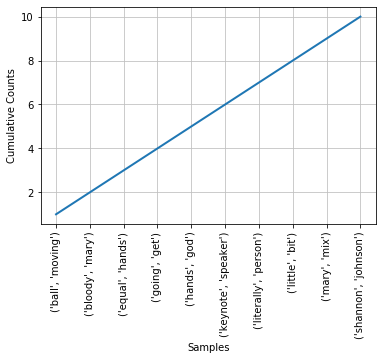

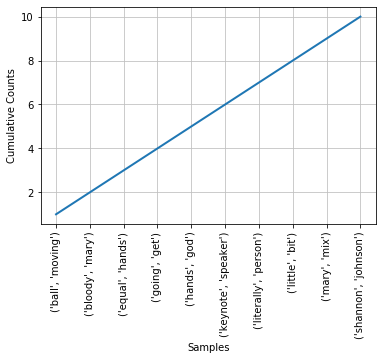

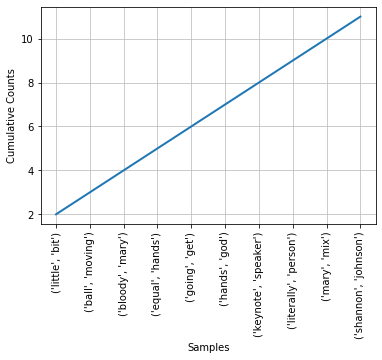

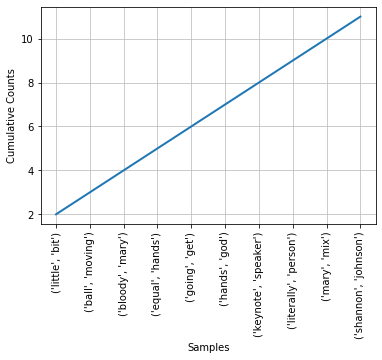

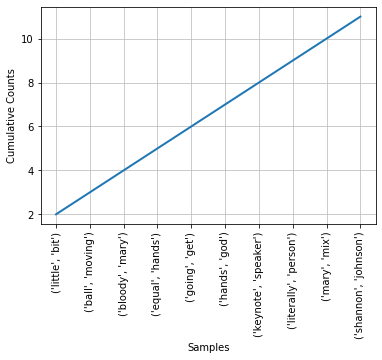

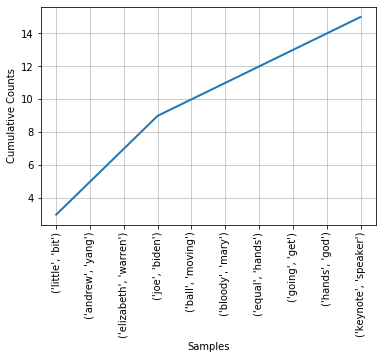

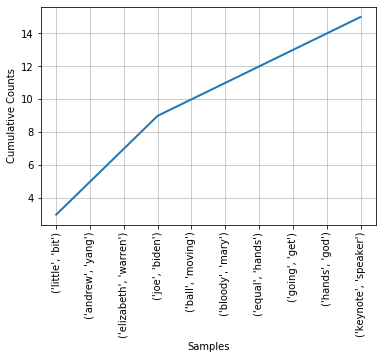

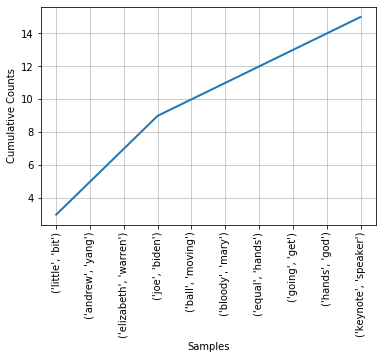

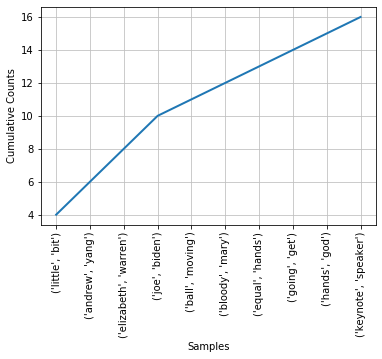

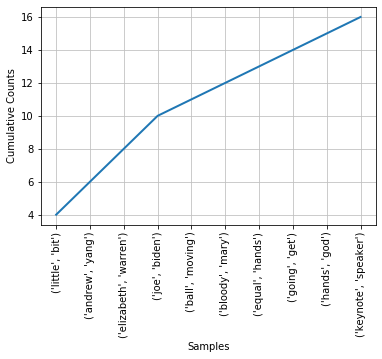

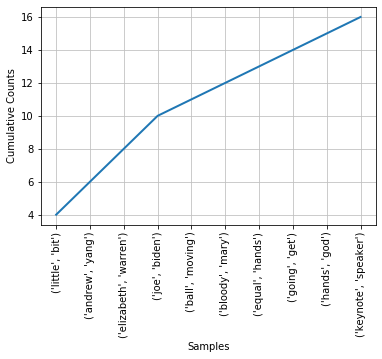

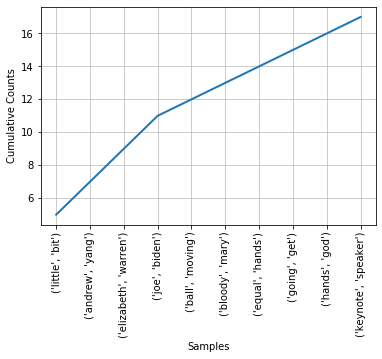

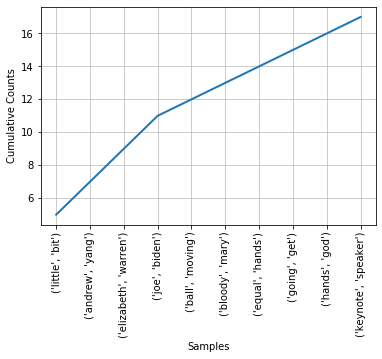

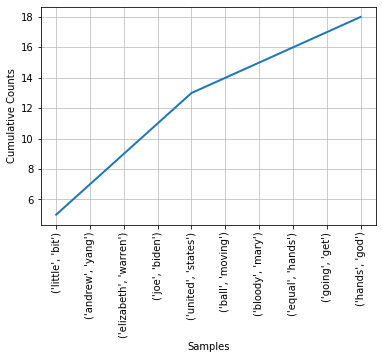

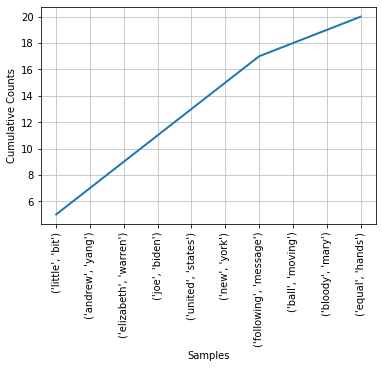

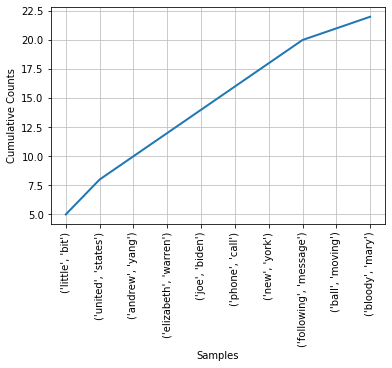

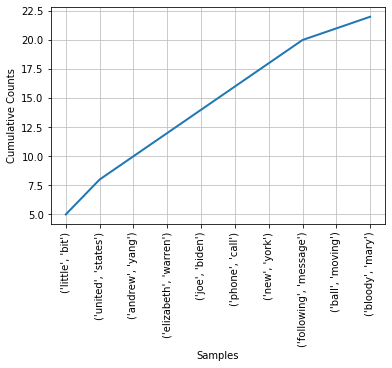

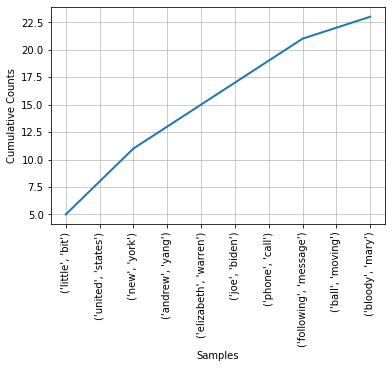

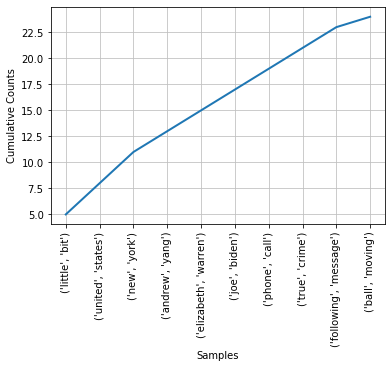

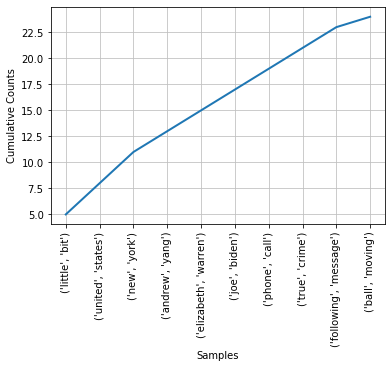

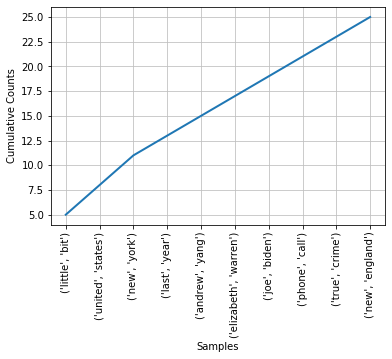

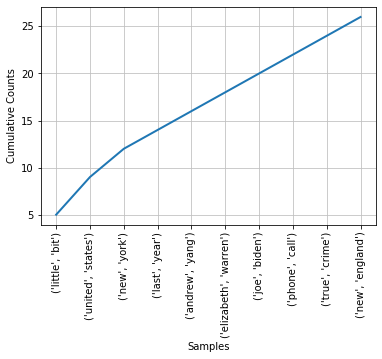

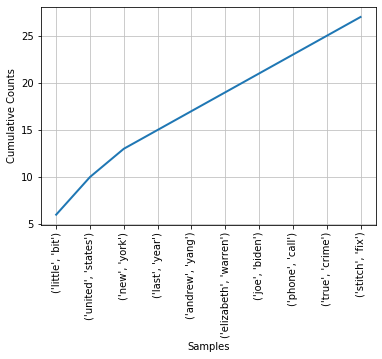

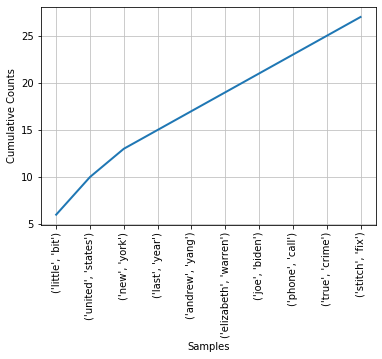

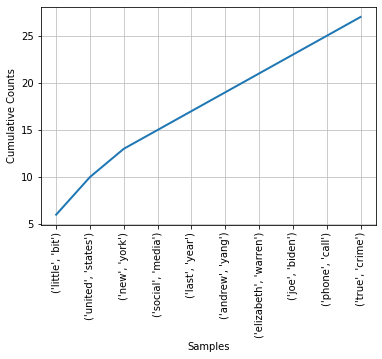

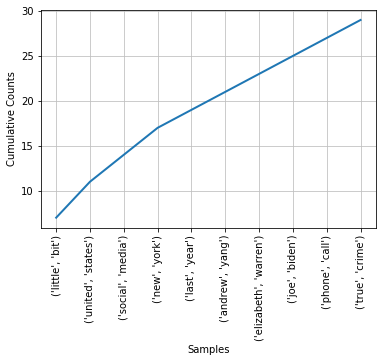

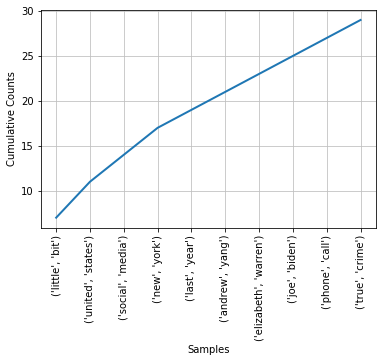

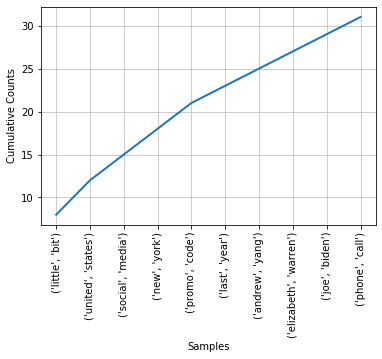

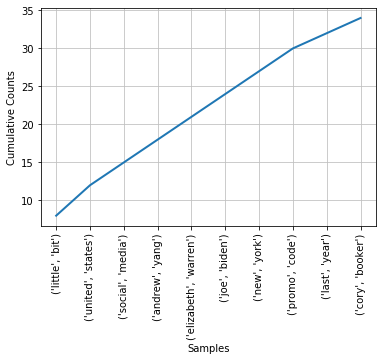

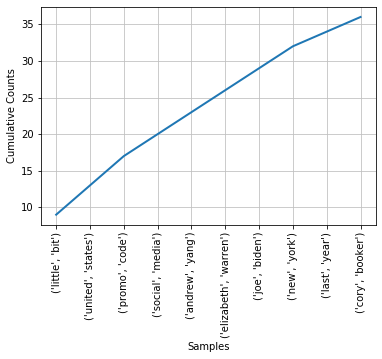

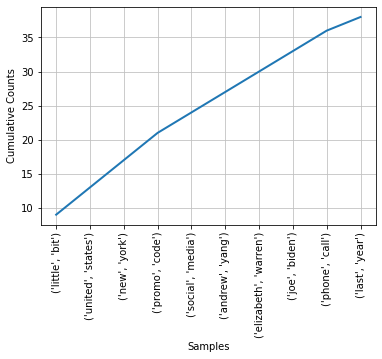

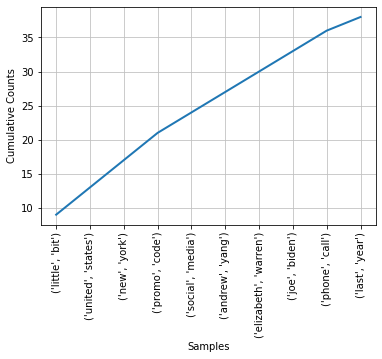

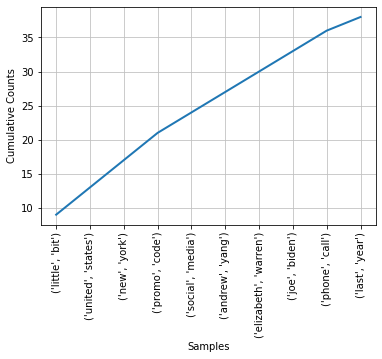

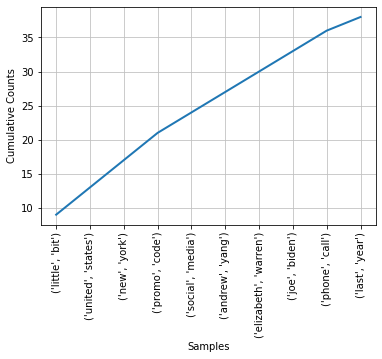

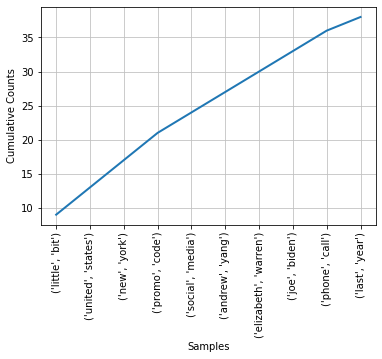

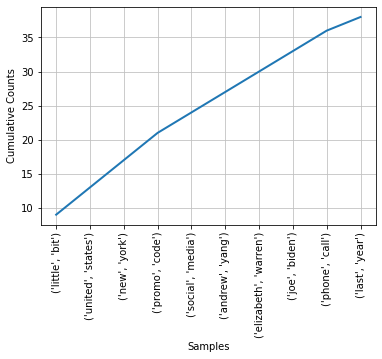

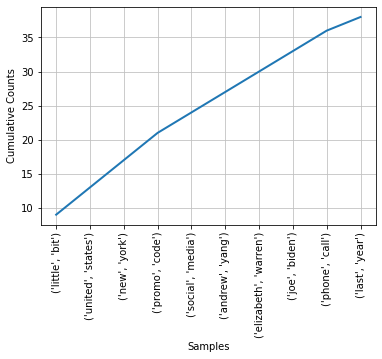

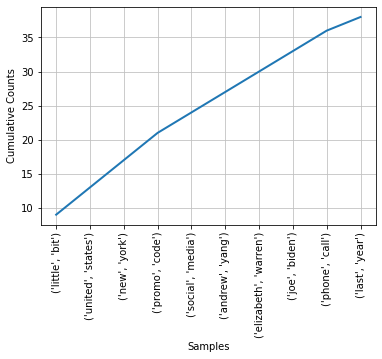

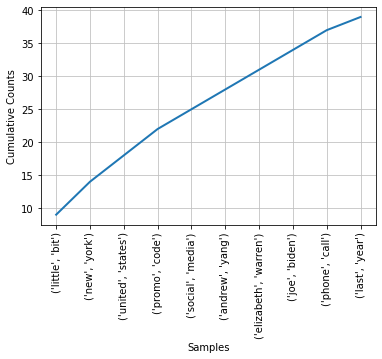

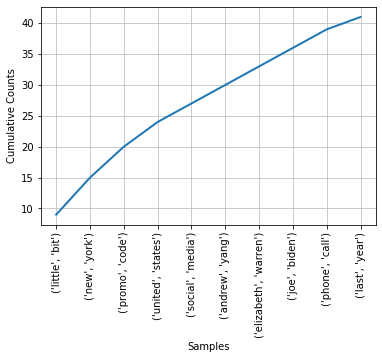

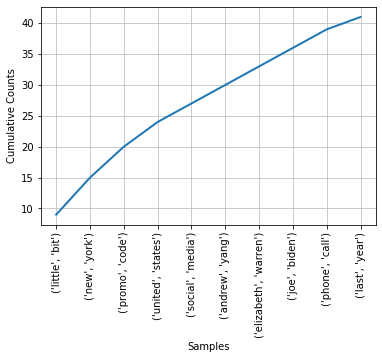

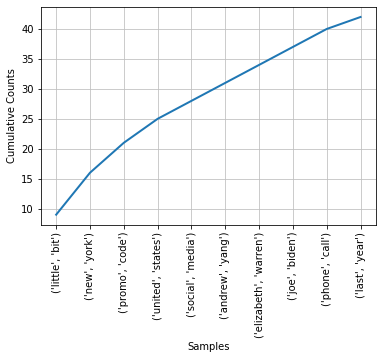

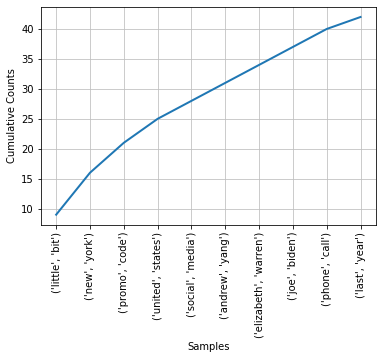

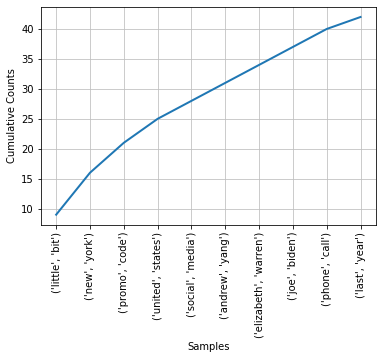

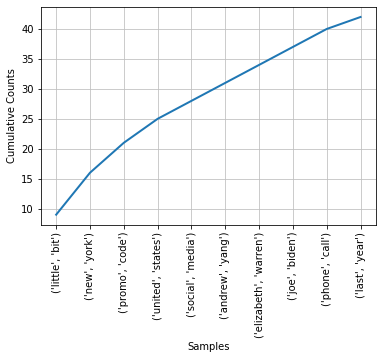

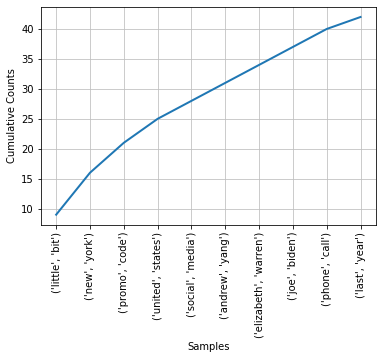

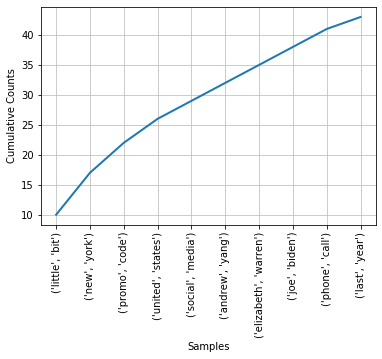

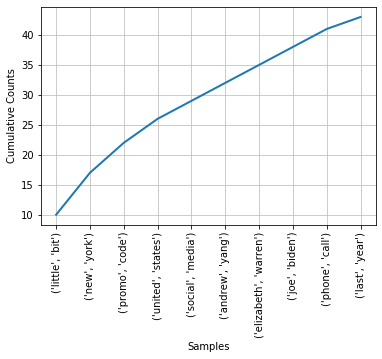

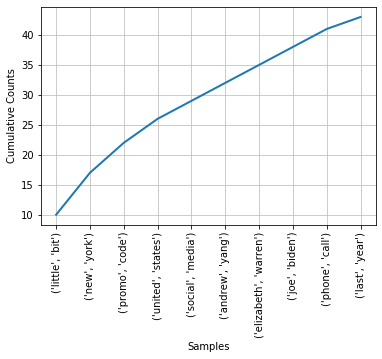

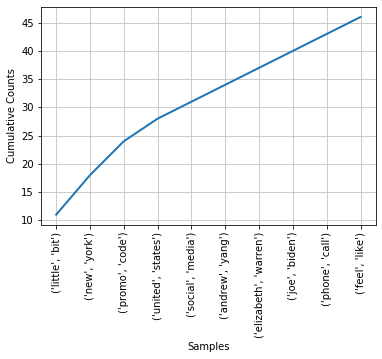

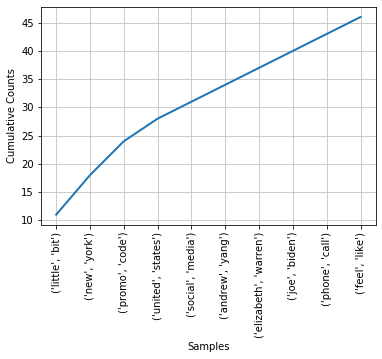

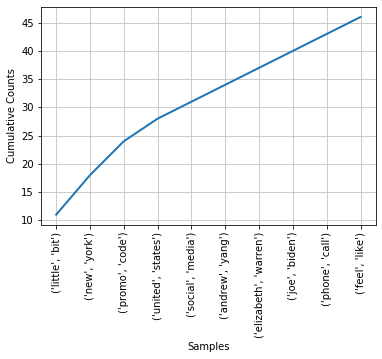

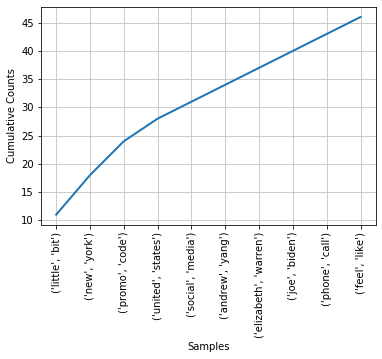

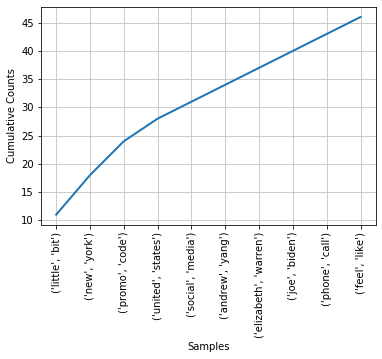

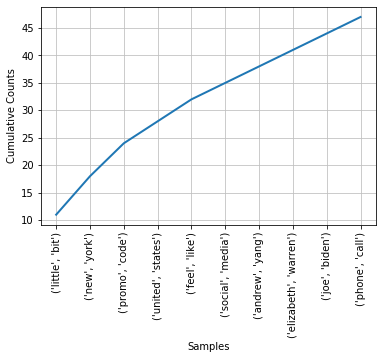

error


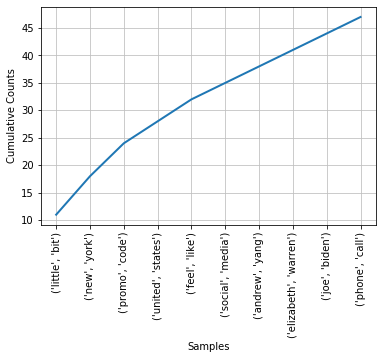

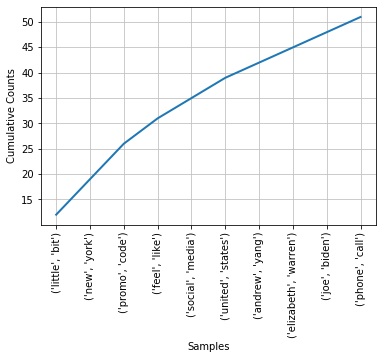

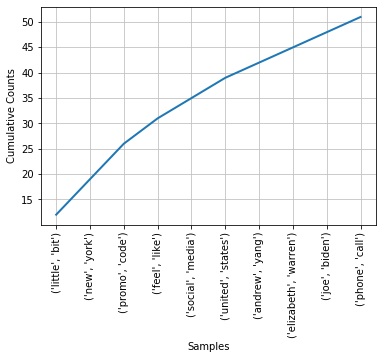

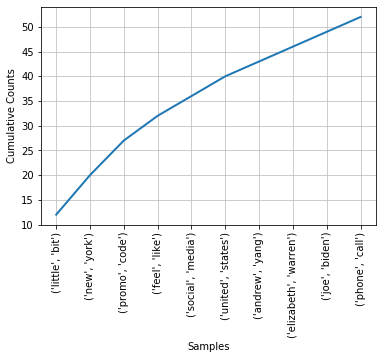

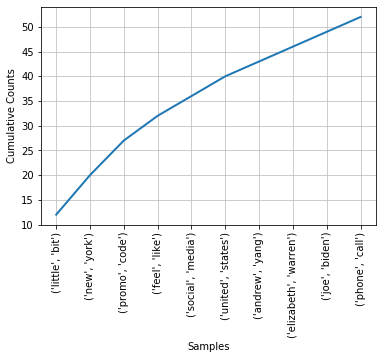

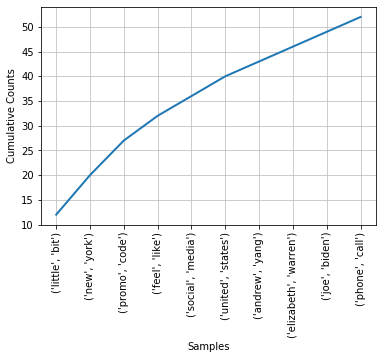

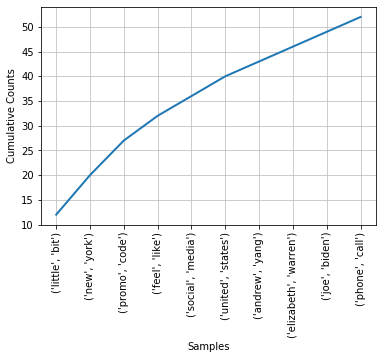

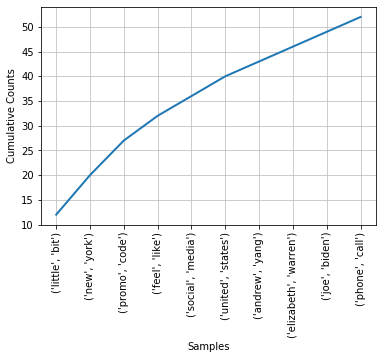

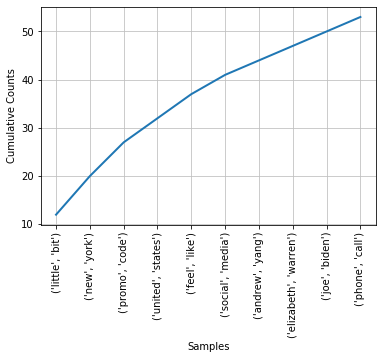

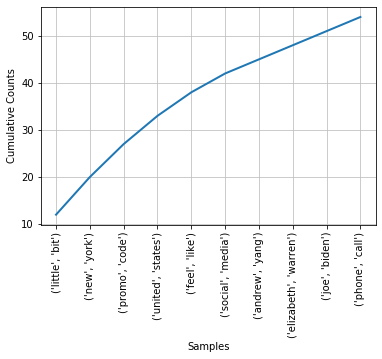

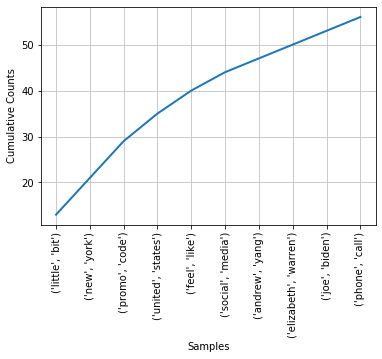

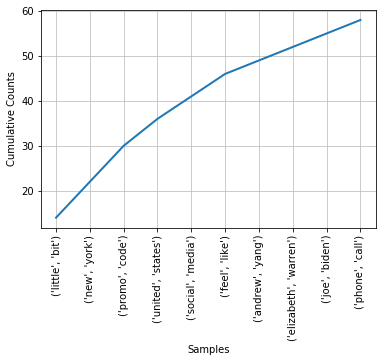

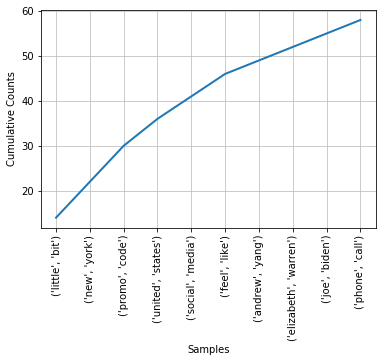

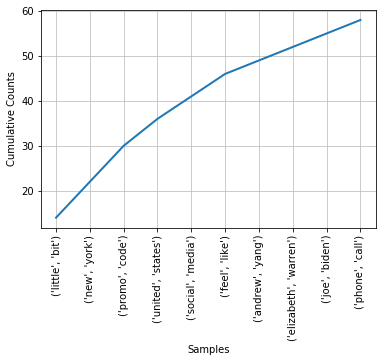

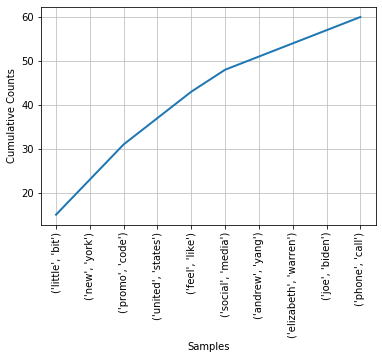

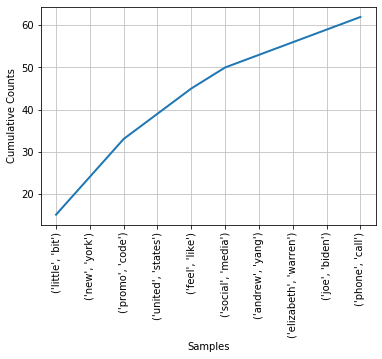

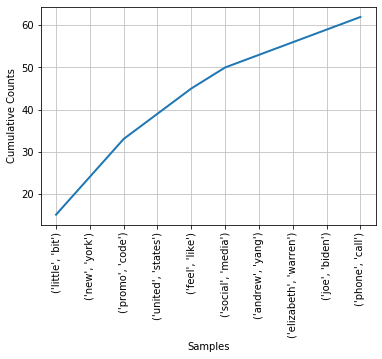

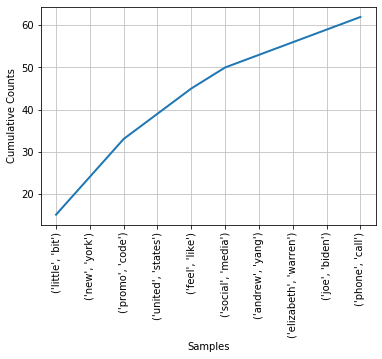

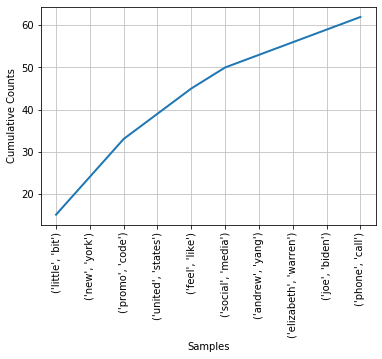

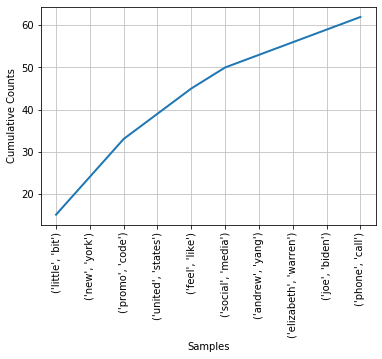

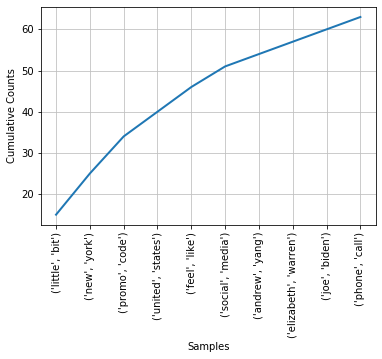

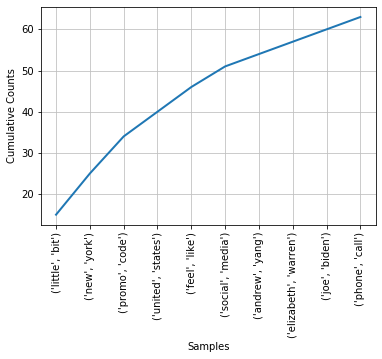

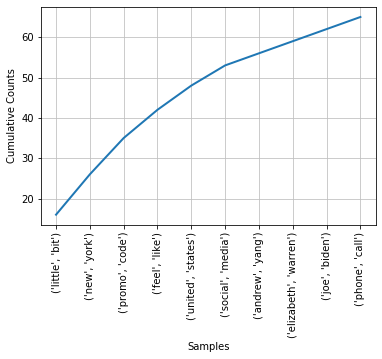

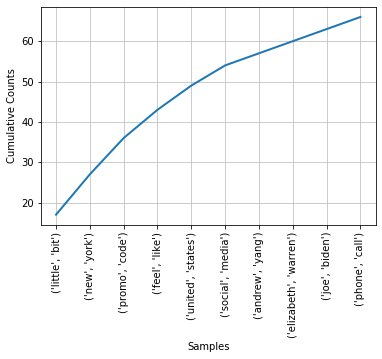

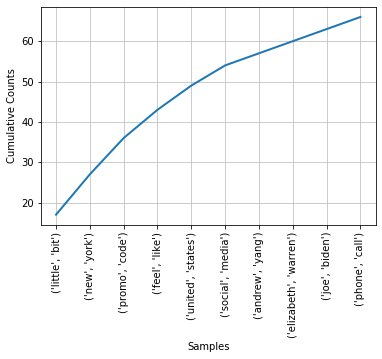

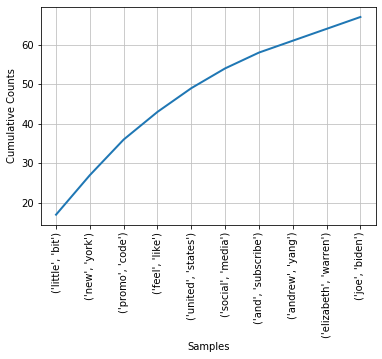

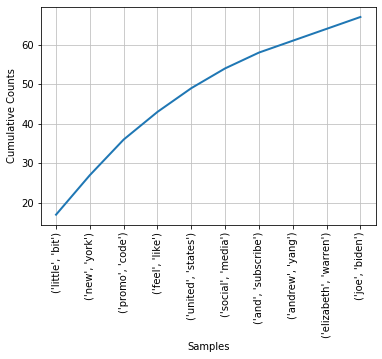

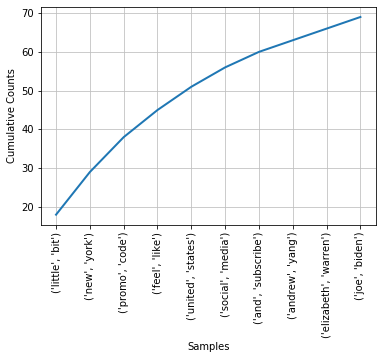

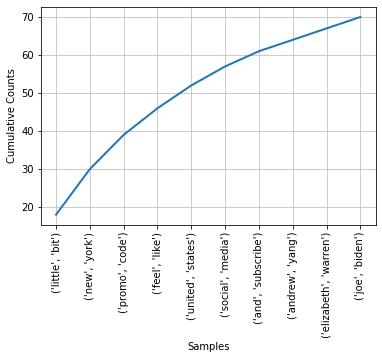

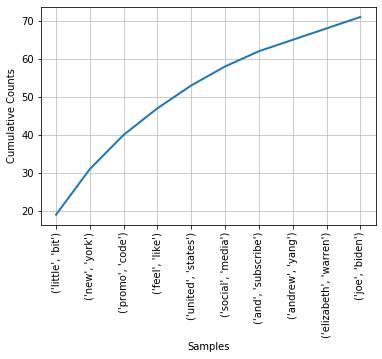

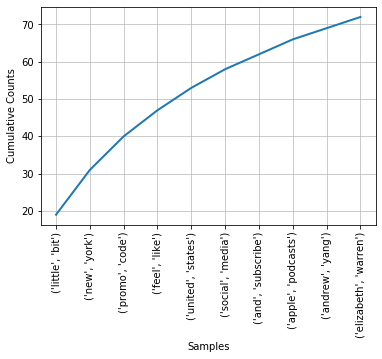

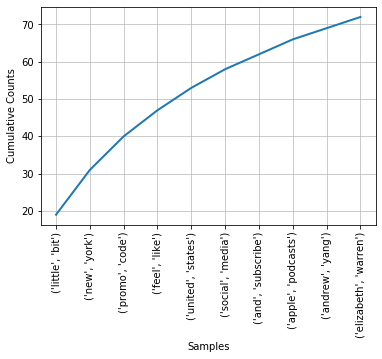

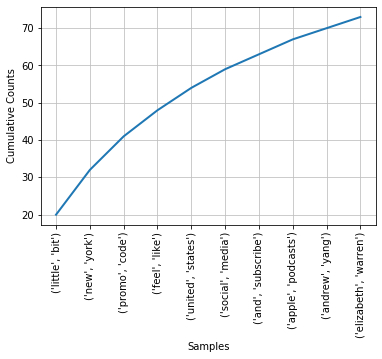

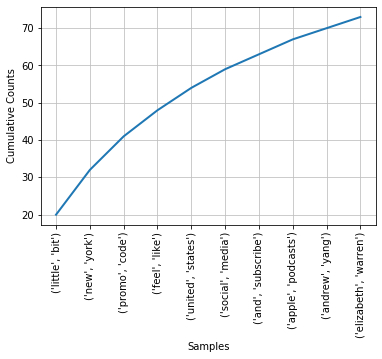

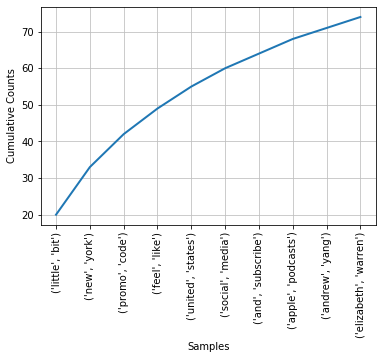

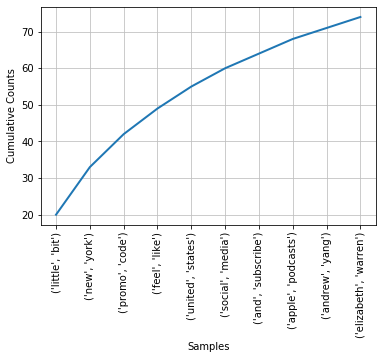

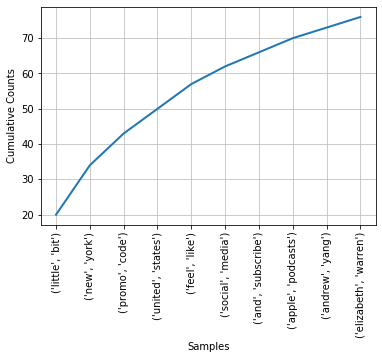

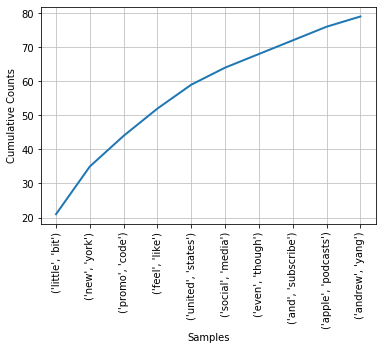

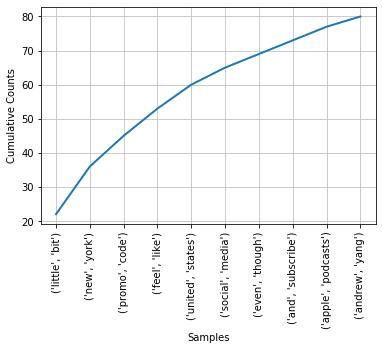

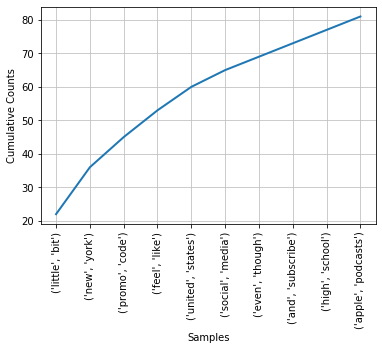

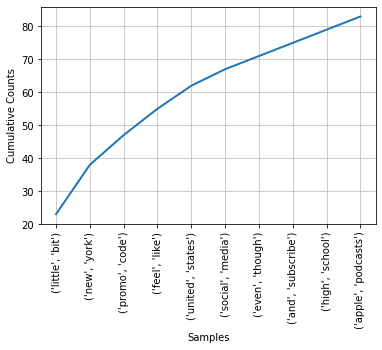

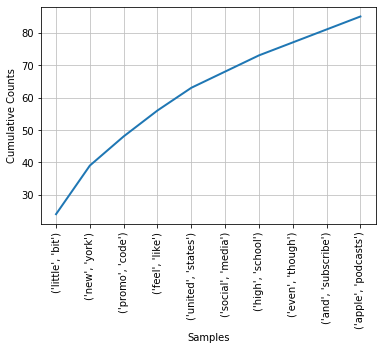

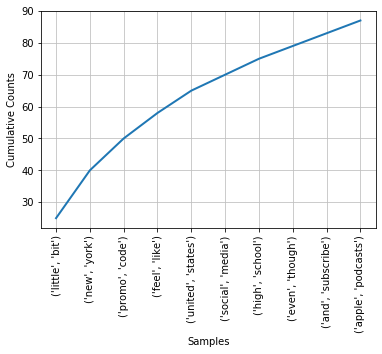

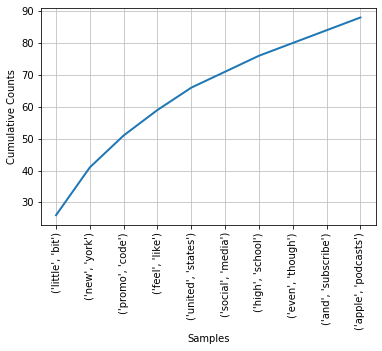

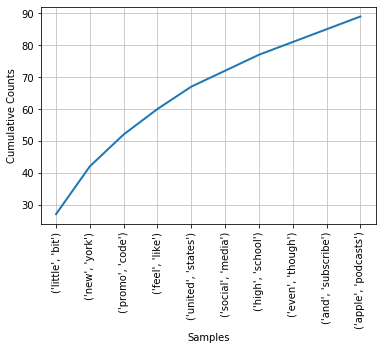

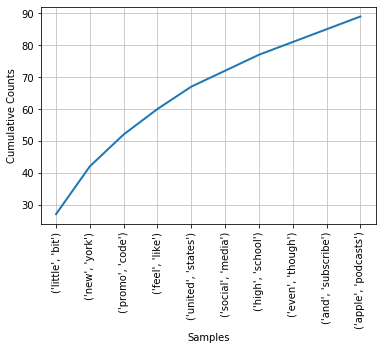

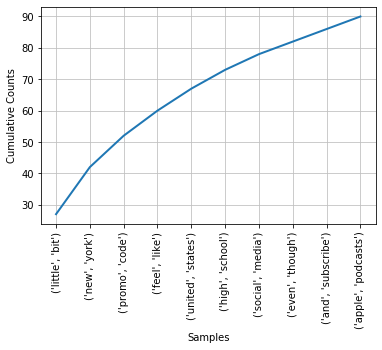

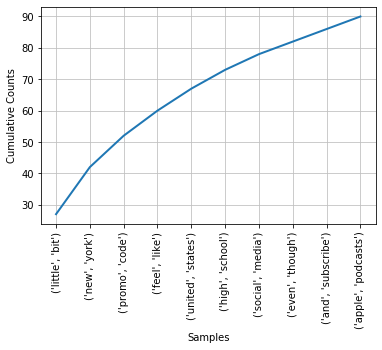

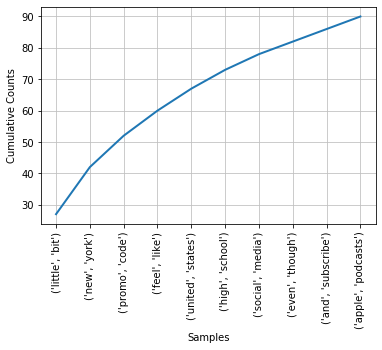

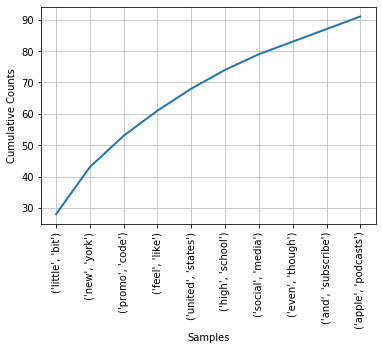

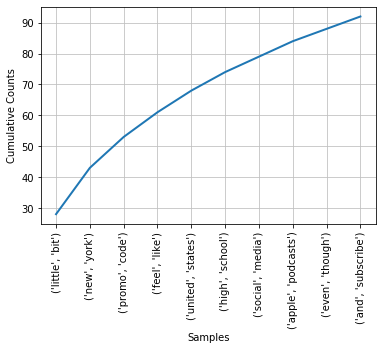

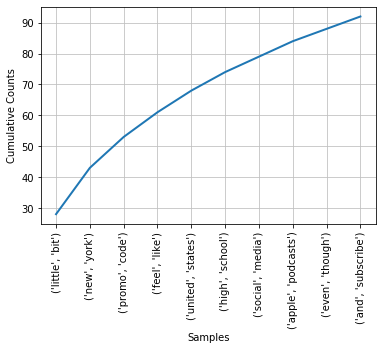

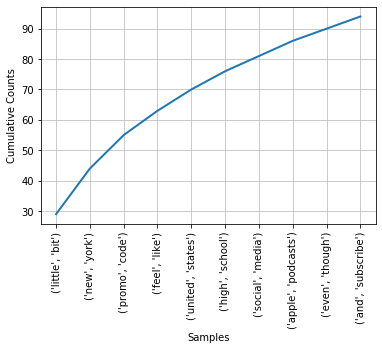

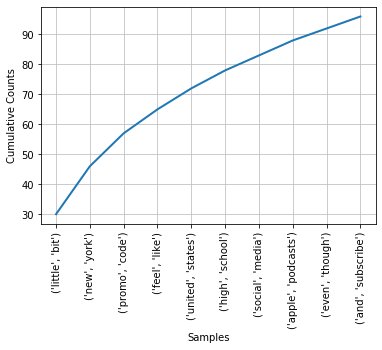

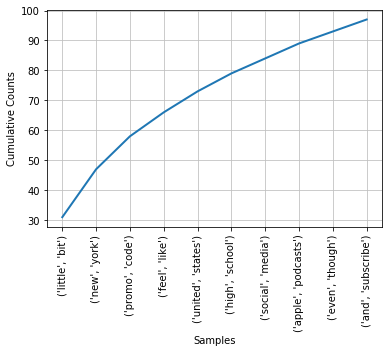

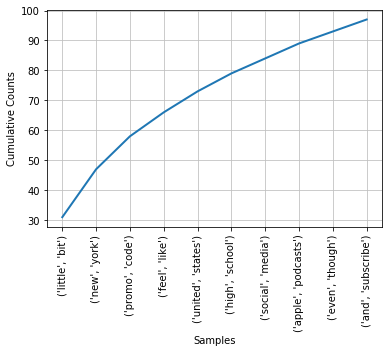

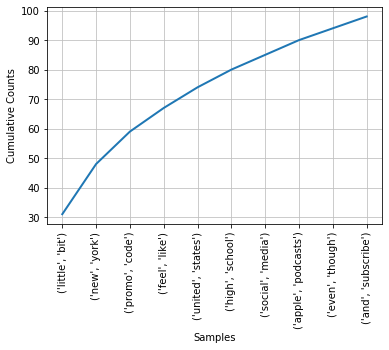

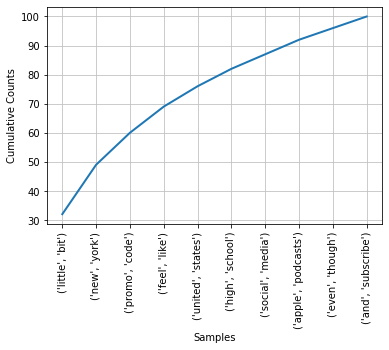

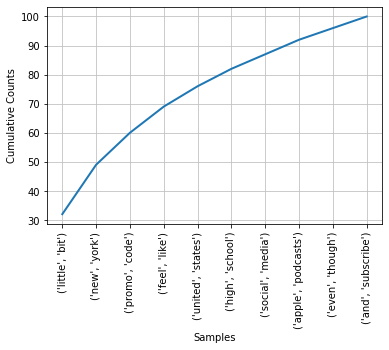

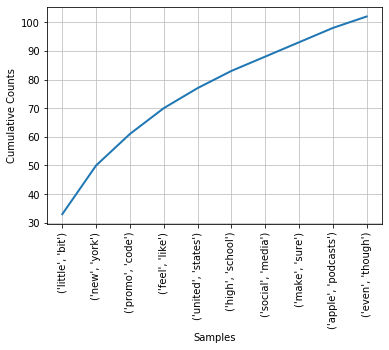

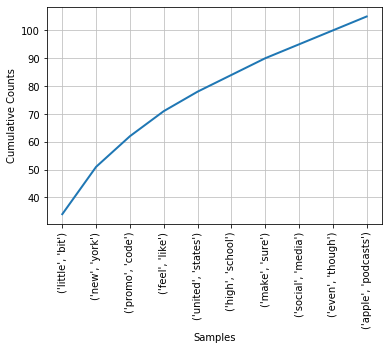

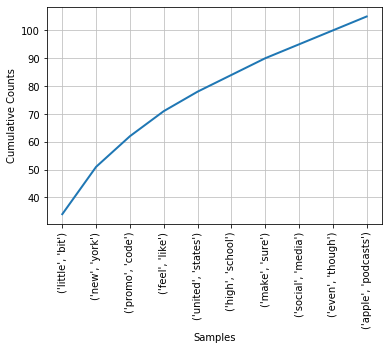

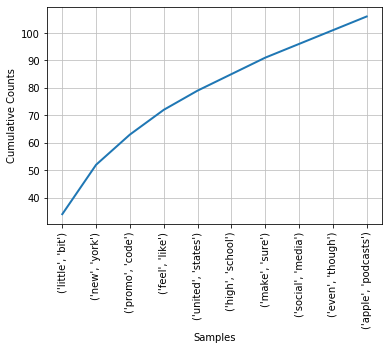

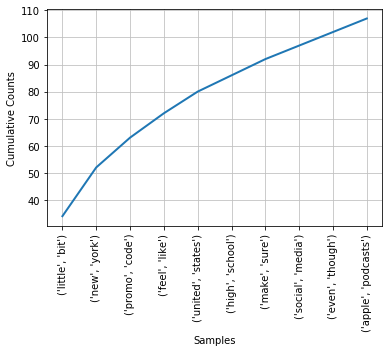

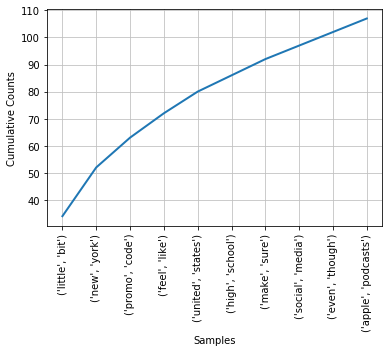

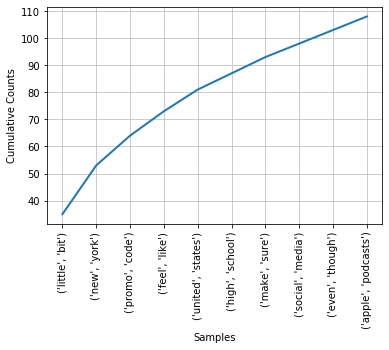

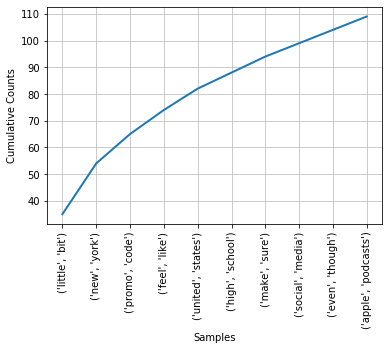

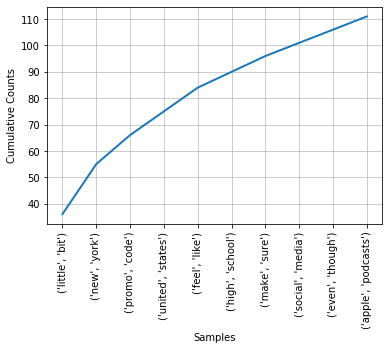

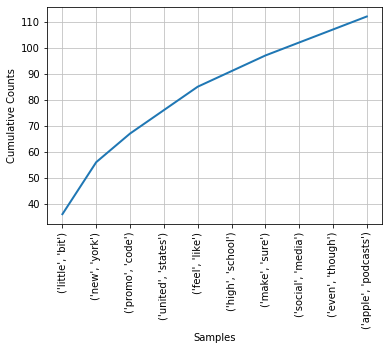

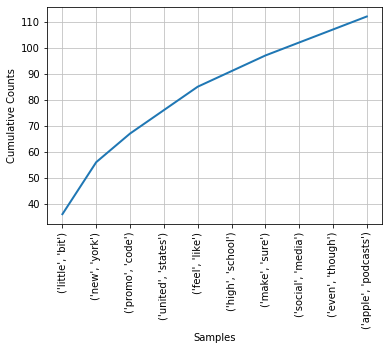

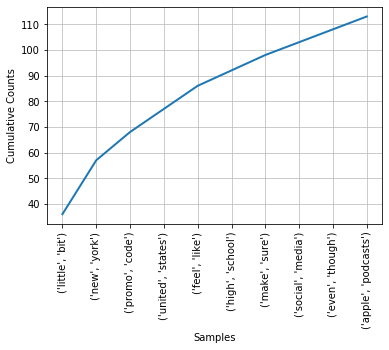

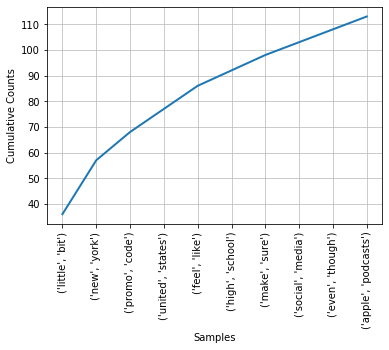

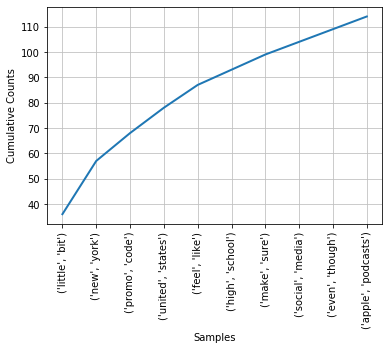

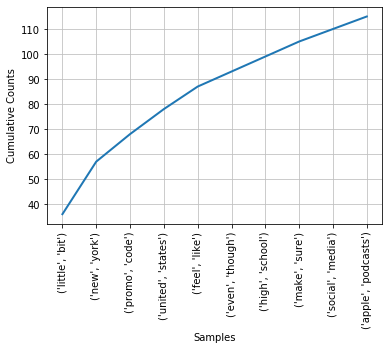

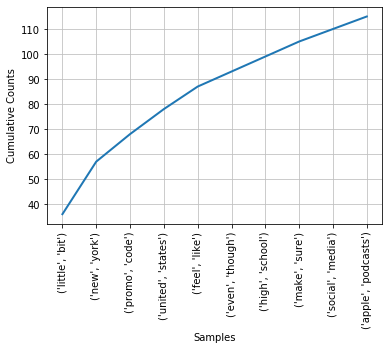

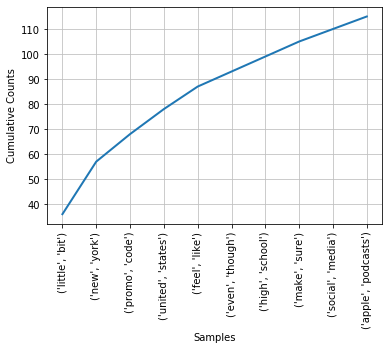

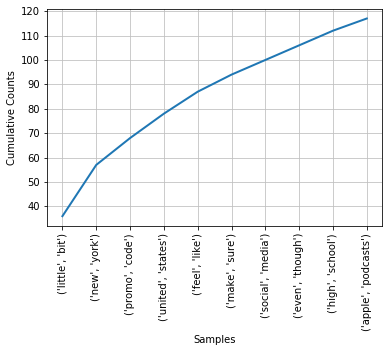

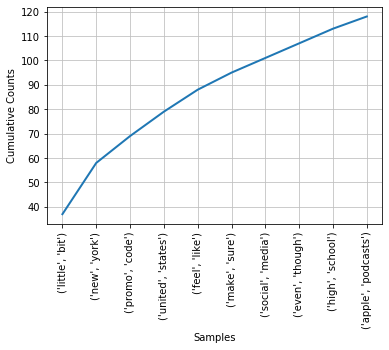

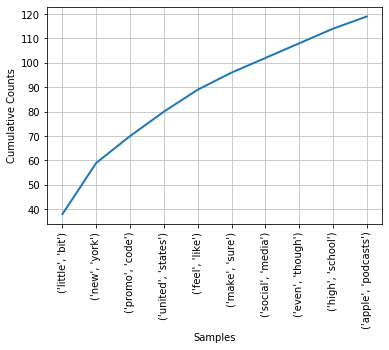

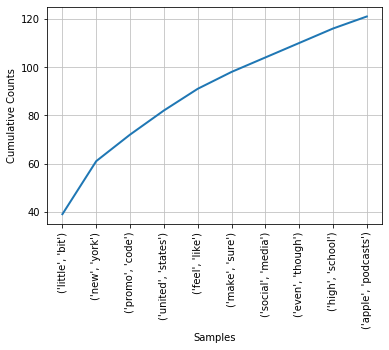

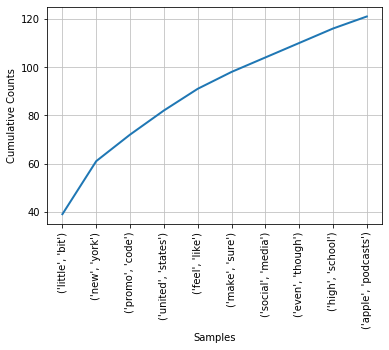

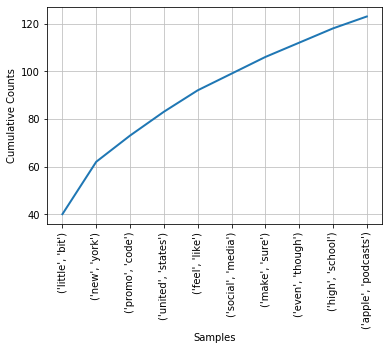

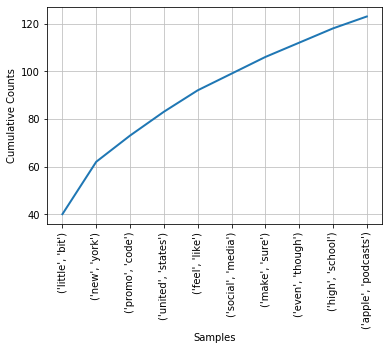

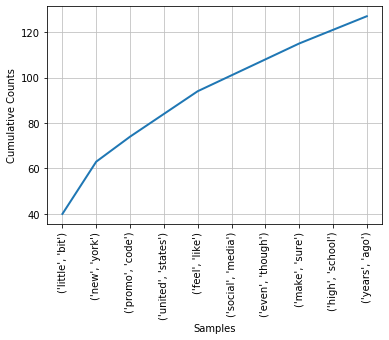

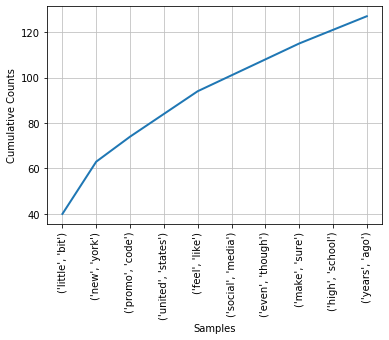

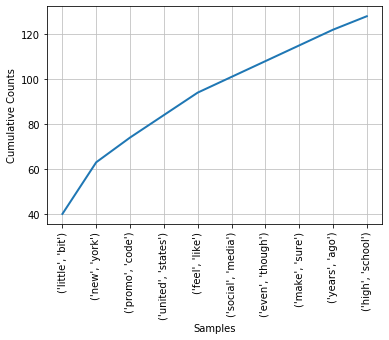

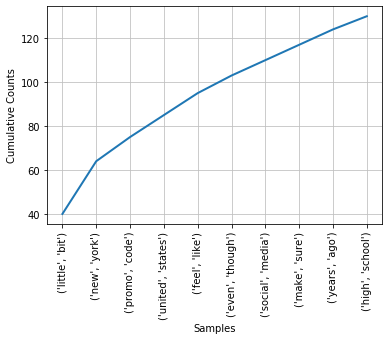

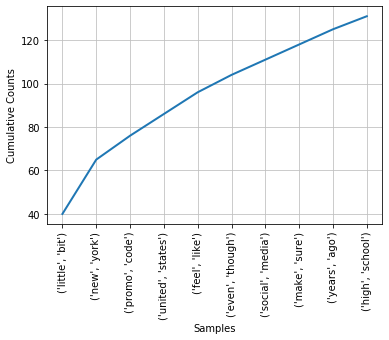

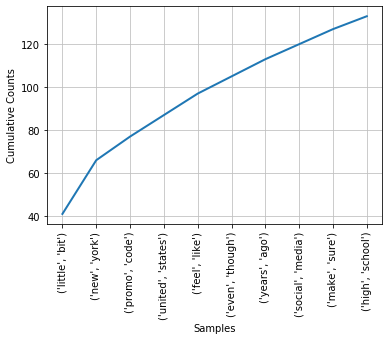

error


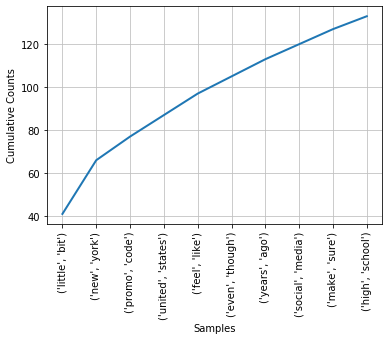

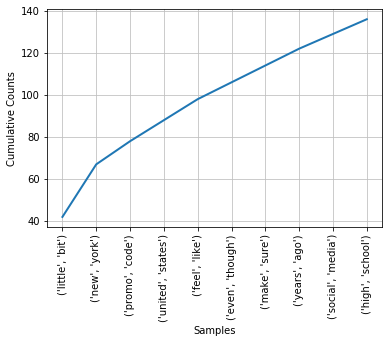

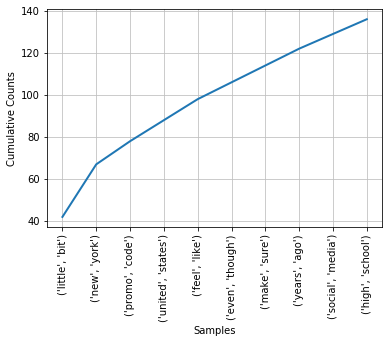

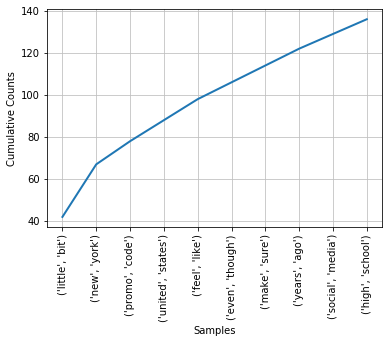

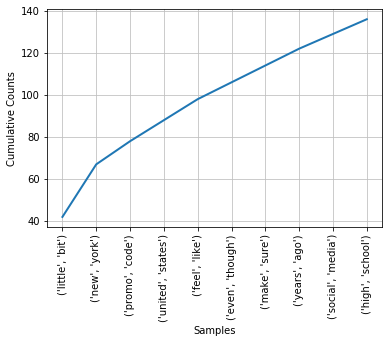

In [11]:
def iterator(index):
    
    labels = ['ID','Name','Date','topicName','scrubbedtext']
    podKnow_Data = pd.DataFrame.from_records(results, columns = labels)
    
    #isolate scrubbed text values and convert to lowercase to avoid duplicates
    scrubbedData = str(podKnow_Data.iloc[index-1:index, 4].values).lower()
    
    #remove junk values
    scrubbedData = scrubbedData.replace("\"", "").replace(",", "").replace("\'",  "")
    
    token = nltk.word_tokenize(scrubbedData)
    tokens = nltk.wordpunct_tokenize(scrubbedData)
            
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    
    #this block removes junk characters and only accepts words 3 letters or longer
    finder = BigramCollocationFinder.from_words(tokens)
    finder.apply_word_filter(lambda w: len(w) < 3)
    
    scored = finder.score_ngrams(bigram_measures.raw_freq)
        
    #returns top 10 bigrams for a given podcast
    return list(sorted(finder.nbest(bigram_measures.likelihood_ratio, 11)))


def excelWriter(bigrams, fileName):   
    
    #convert to xlsx format
    fileName = fileName.replace(".txt_scrubbed", ".xlsx")
    
    workbook = xlsxwriter.Workbook(fileName) 
    worksheet = workbook.add_worksheet() 
    
    bigramList = []
    
    #convert tuples to readable string list
    for x in bigrams:
        bigramList.append(str(x))
        
    #print tuples to xlsx file after removing junk values    
    for y in range(1, len(bigramList)): 
        
         output = bigramList[y].split(',')
            
         firstGram = str(output[0].replace("(", "").replace("\'",  "")).replace(")",  "")
         secondGram = str(output[1].replace("(", "").replace("\'",  "").replace(")",  ""))
            
         worksheet.write('A' + str(y), firstGram)
         worksheet.write('B' + str(y), secondGram)         
                         
    workbook.close()

results = []
counter = 0
totalList = []

saveLocation = r'C:\Users\Jeremy\Desktop\scrubbed transcripts\gcsst\scrubbed'
for folderName,subfolders,fileName in os.walk(r'C:\Users\Jeremy\Desktop\scrubbed transcripts\gcsst\scrubbed'):
    
    for file in fileName:
        if str(file.endswith(".txt_scrubbed")):
            f = open(os.path.join(folderName,file),'rb')
            data = pickle.load(f)
            
        try:
            value0, value1, value2,value3, *extraWords = file.split('_')
            value4 = data
            rows = (value0,value1,value2,value3, value4)
            results.append(rows)
            
            counter = counter + 1
            
            #gets scrubbed text bigrams for a given counter index
            bigrams = iterator(counter)
            
            excelWriter(bigrams, file)
            
            #continually add the total contents of every podcast together
            totalList.extend(bigrams)
            
            #graph each result 
            fdist = FreqDist(totalList)
            fdist.plot(10, cumulative=True)
            
        except:
            print("error")